In [ ]:
from sklearn.datasets import make_classification
import numpy as np
from matplotlib import pyplot
from collections import Counter

In [ ]:
X, y = make_classification(n_samples = 10000, n_features = 2, n_redundant =0, n_clusters_per_class = 1,
                          weights = [0.99], random_state = 1) 

In [ ]:
counter = Counter(y)

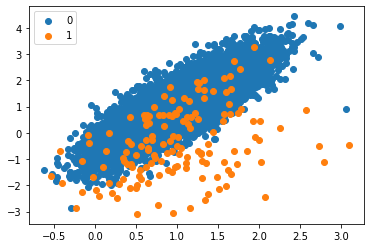

In [ ]:
for label, _ in counter.items():
    row_ix = np.where(y == label)[0]
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label = str(label))
pyplot.legend()
pyplot.show()

In [ ]:
print(counter)

Counter({0: 9853, 1: 147})


In [ ]:
!pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import imblearn
print(imblearn.__version__)

0.8.1


### UnderSampling

~уменьшение кол-ва экземпляров мажоритарного класса

In [ ]:
#удаление экземпляров мажоритарного класса с помощью евклидового расстояния
#NearMiss v1
from imblearn.under_sampling import NearMiss, RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE
undersampling_v1 = NearMiss(version = 1) 

Counter({0: 147, 1: 147})


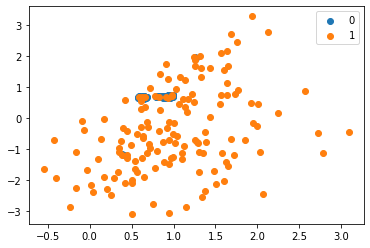

In [ ]:

rand_undersampling = RandomUnderSampler(sampling_strategy = 'majority')

X_over, y_over = rand_undersampling.fit_resample(X,y)
counter = Counter(y_over)
print(counter)

for label, _ in counter.items():
    row_ix = np.where(y_over == label)[0]
    pyplot.scatter(X_over[row_ix, 0], X_over[row_ix, 1], label = str(label))
pyplot.legend()
pyplot.show()

### OverSampling
~увеличение кол-ва примеров мажоритарного классса

Counter({0: 147, 1: 147})


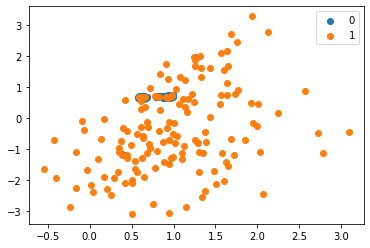

In [ ]:
# RandomOverSampling

rand_oversampling = RandomOverSampler(sampling_strategy = 'minority')

X_over, y_over = rand_oversampling.fit_resample(X,y)
counter = Counter(y_over)
print(counter)

for label, _ in counter.items():
    row_ix = np.where(y_over == label)[0]
    pyplot.scatter(X_over[row_ix, 0], X_over[row_ix, 1], label = str(label))
pyplot.legend()
pyplot.show()  

Counter({0: 9853, 1: 9853})


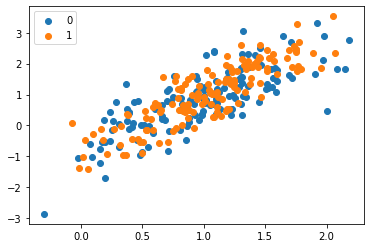

In [ ]:
# SMOTE

smote = SMOTE()

X_new, y_new = smote.fit_resample(X,y)
counter = Counter(y_new)
print(counter)

for label, _ in counter.items():
    row_ix = np.where(y_over == label)[0]
    pyplot.scatter(X_new[row_ix, 0], X_new[row_ix, 1], label = str(label))
pyplot.legend()
pyplot.show()  

In [ ]:
import pandas as pd
data = pd.read_csv('/content/creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
#Смотрим распределение классов
data['Class'].value_counts()

0.0    53417
1.0      153
Name: Class, dtype: int64

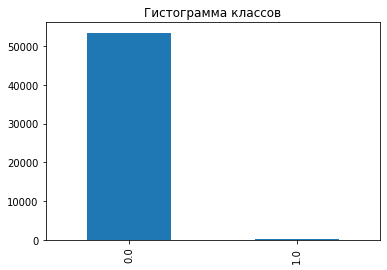

In [ ]:
#построим гистрограмму
pd.value_counts(data['Class']).plot.bar()
pyplot.title('Гистограмма классов')
pyplot.show()

In [ ]:
from sklearn.model_selection import train_test_split
X1 = np.array(data.iloc[:, data.columns != 'Class'])
y1 = X = np.array(data.iloc[:, data.columns == 'Class'])

X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.3, random_state =0)


In [ ]:
X_train[2]

array([ 3.38440000e+04, -1.06197480e+00,  1.43208471e+00,  1.00432694e+00,
        7.14998036e-01, -3.72873649e-02, -6.29165363e-01,  1.29616292e+00,
       -4.98580075e-01,  2.45366570e-02,  9.78340743e-01, -2.25607950e-01,
        1.48967314e-01,  7.00961100e-01, -2.66869218e-01,  1.04675871e+00,
       -4.71897044e-01, -3.84009017e-01, -5.96952540e-02,  3.57534222e-01,
        3.48008157e-01, -1.43079916e-02,  5.42200647e-01, -1.02195997e-01,
        4.16823329e-01, -8.81864042e-02, -3.57347620e-01,  2.42592556e-01,
        1.63822590e-01,  7.05000000e+01])

In [ ]:
print('Количество класса 1 до трансформации{}'.format(sum(y_train == 1)))
print('Количество класса 0 до трансформации{}'.format(sum(y_train == 0)))

sm = SMOTE()

X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print('Количество класса 1 после трансформации{}'.format(sum(y_train_res == 1)))
print('Количество класса 0 после трансформации{}'.format(sum(y_train_res == 0)))

Количество класса 1 до трансформации[112]
Количество класса 0 до трансформации[37386]


ValueError: ignored